<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/Assignment14_decisisontree(companydata).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statistics as stat
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

In [79]:
#importing dataset
company = pd.read_csv("/content/Company_Data (1).csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [80]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [81]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [82]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [83]:
company.shape

(400, 11)

Converting target variable to categorical data

In [84]:
company.insert(11,'Sales_class'," ")

for i in range(0,len(company['Sales']),1):
    if company['Sales'].iloc[i]<=7.5:
        company['Sales_class'].iloc[i]='Low'
    else:
        company['Sales_class'].iloc[i]='high'

<ipython-input-84-27c95d43ed05>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Sales_class'].iloc[i]='high'
<ipython-input-84-27c95d43ed05>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Sales_class'].iloc[i]='Low'


In [85]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [86]:
company.drop(['Sales'],axis=1,inplace=True)
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


Label encoding

In [87]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc'])
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US'])
company['Sales_class']= label_encoder.fit_transform(company['Sales_class'])

In [88]:
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


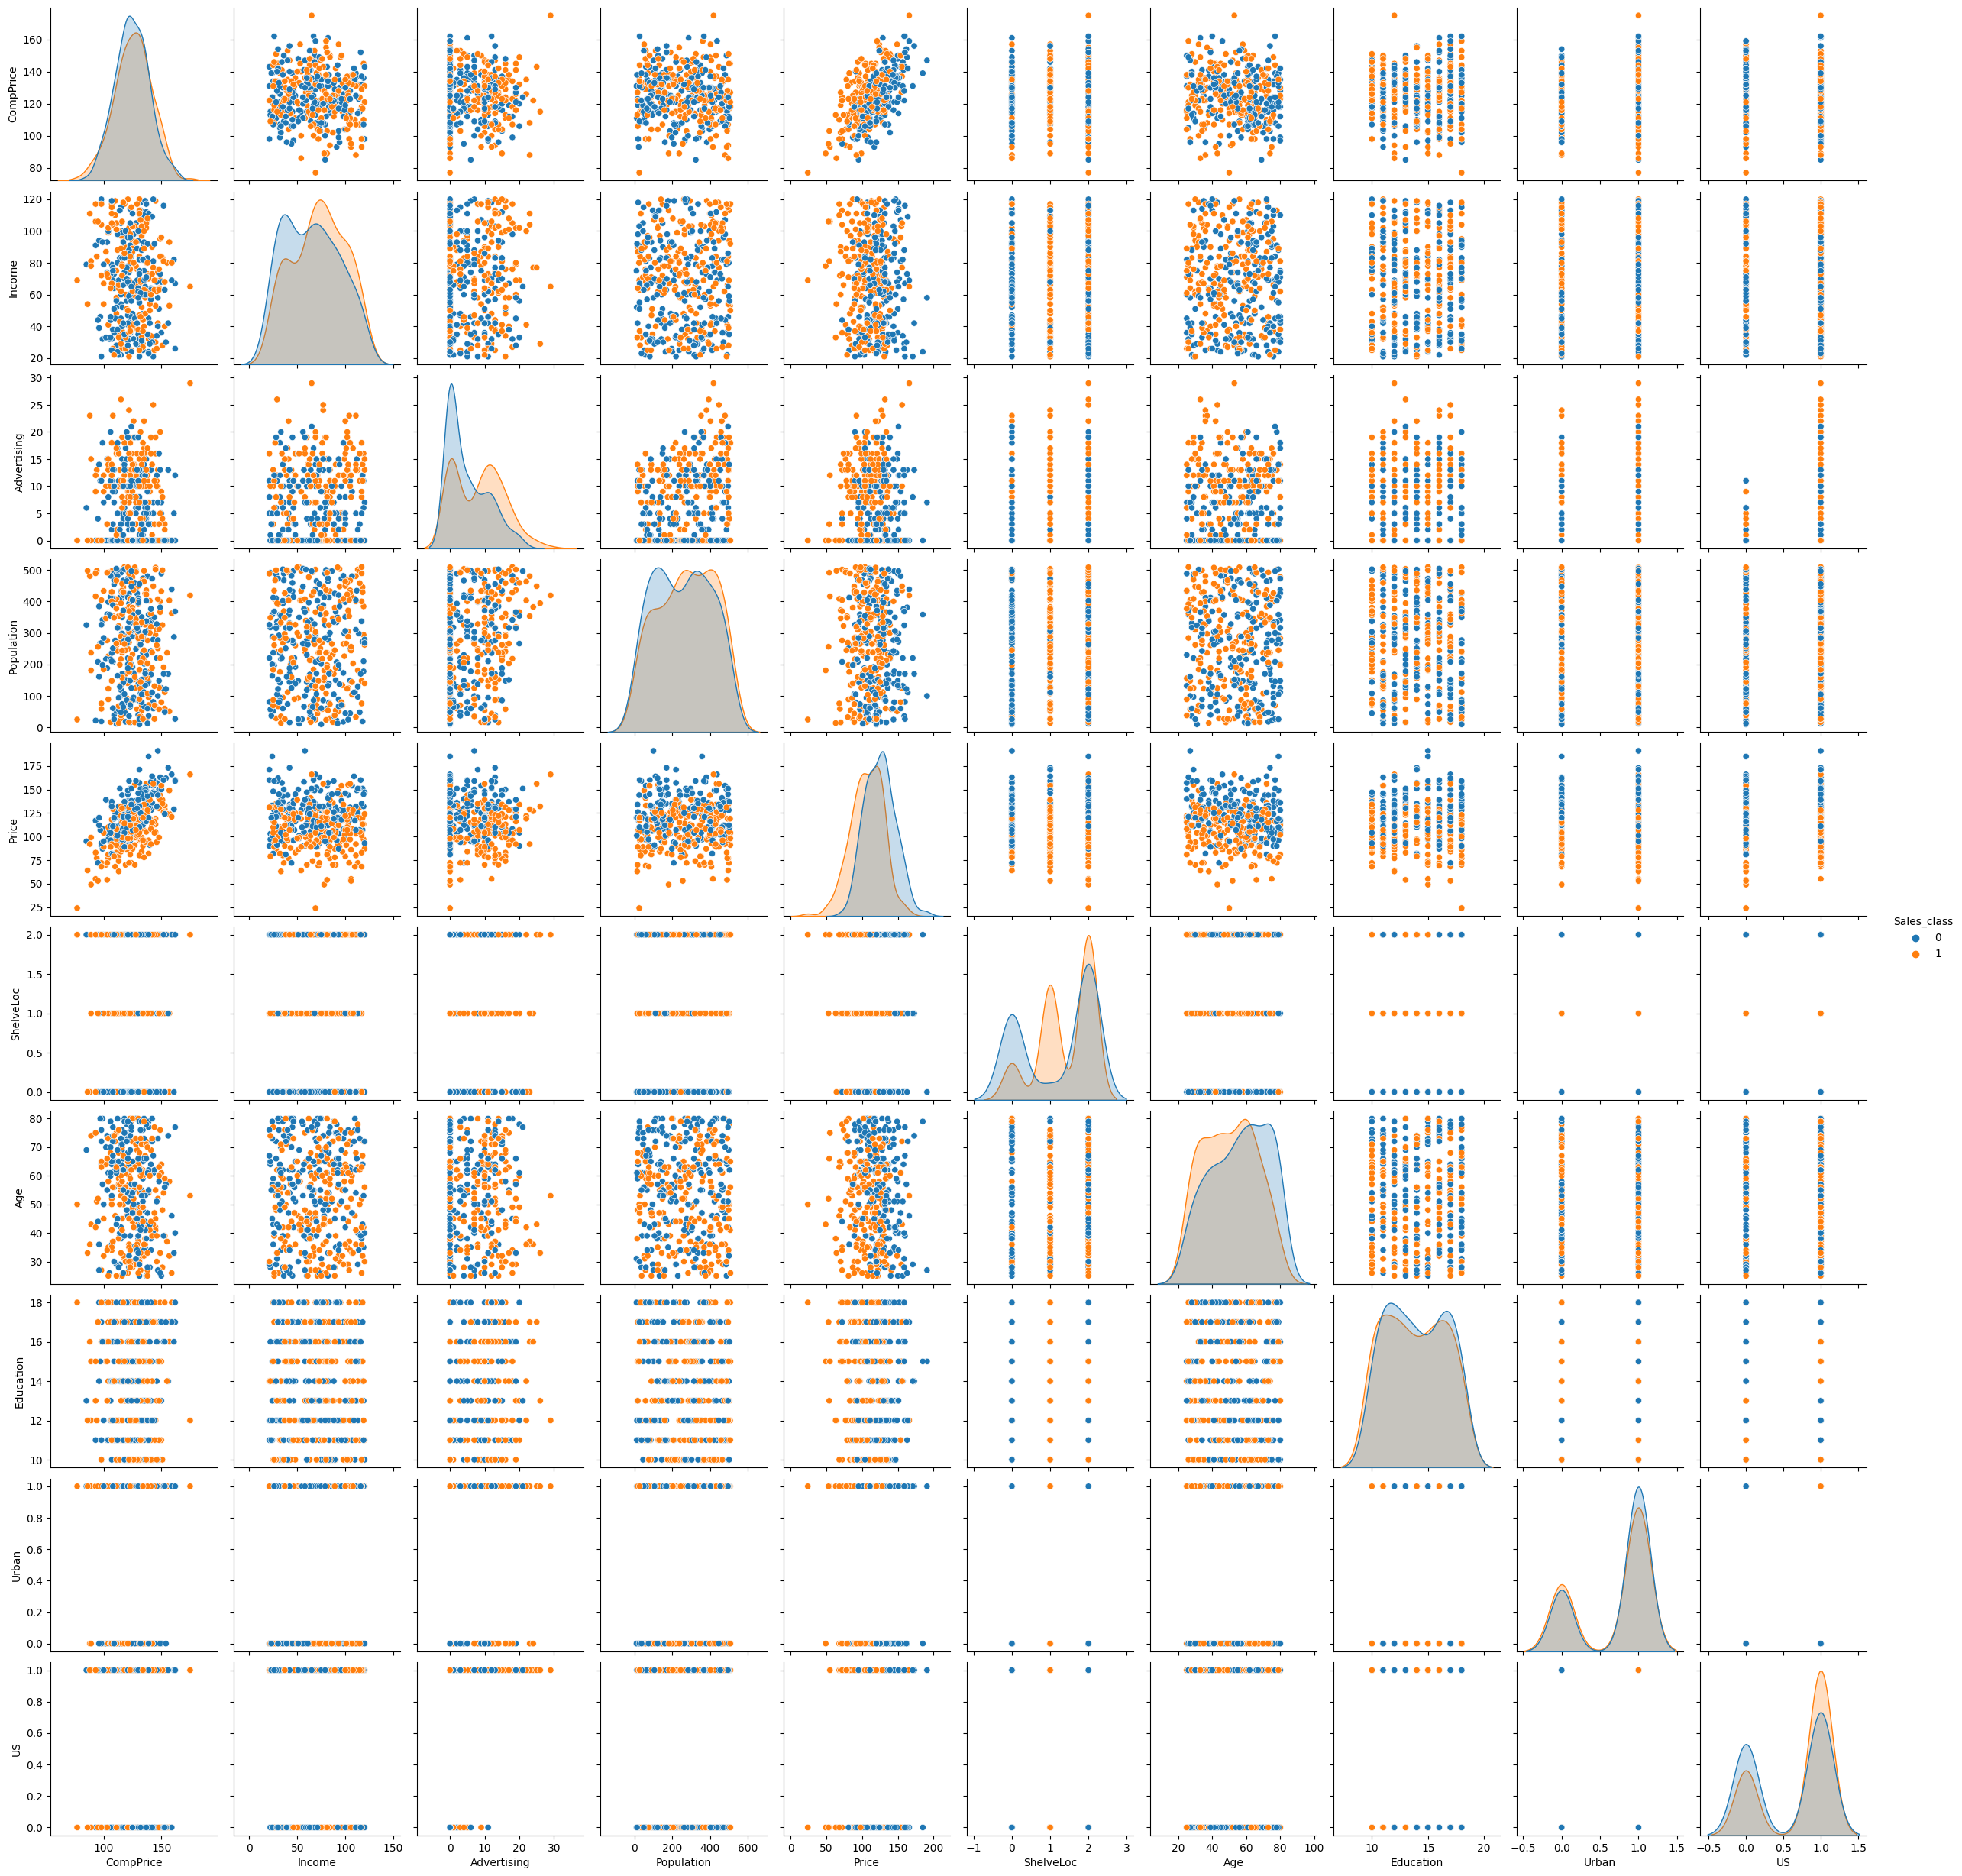

In [89]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=company, hue = 'Sales_class')

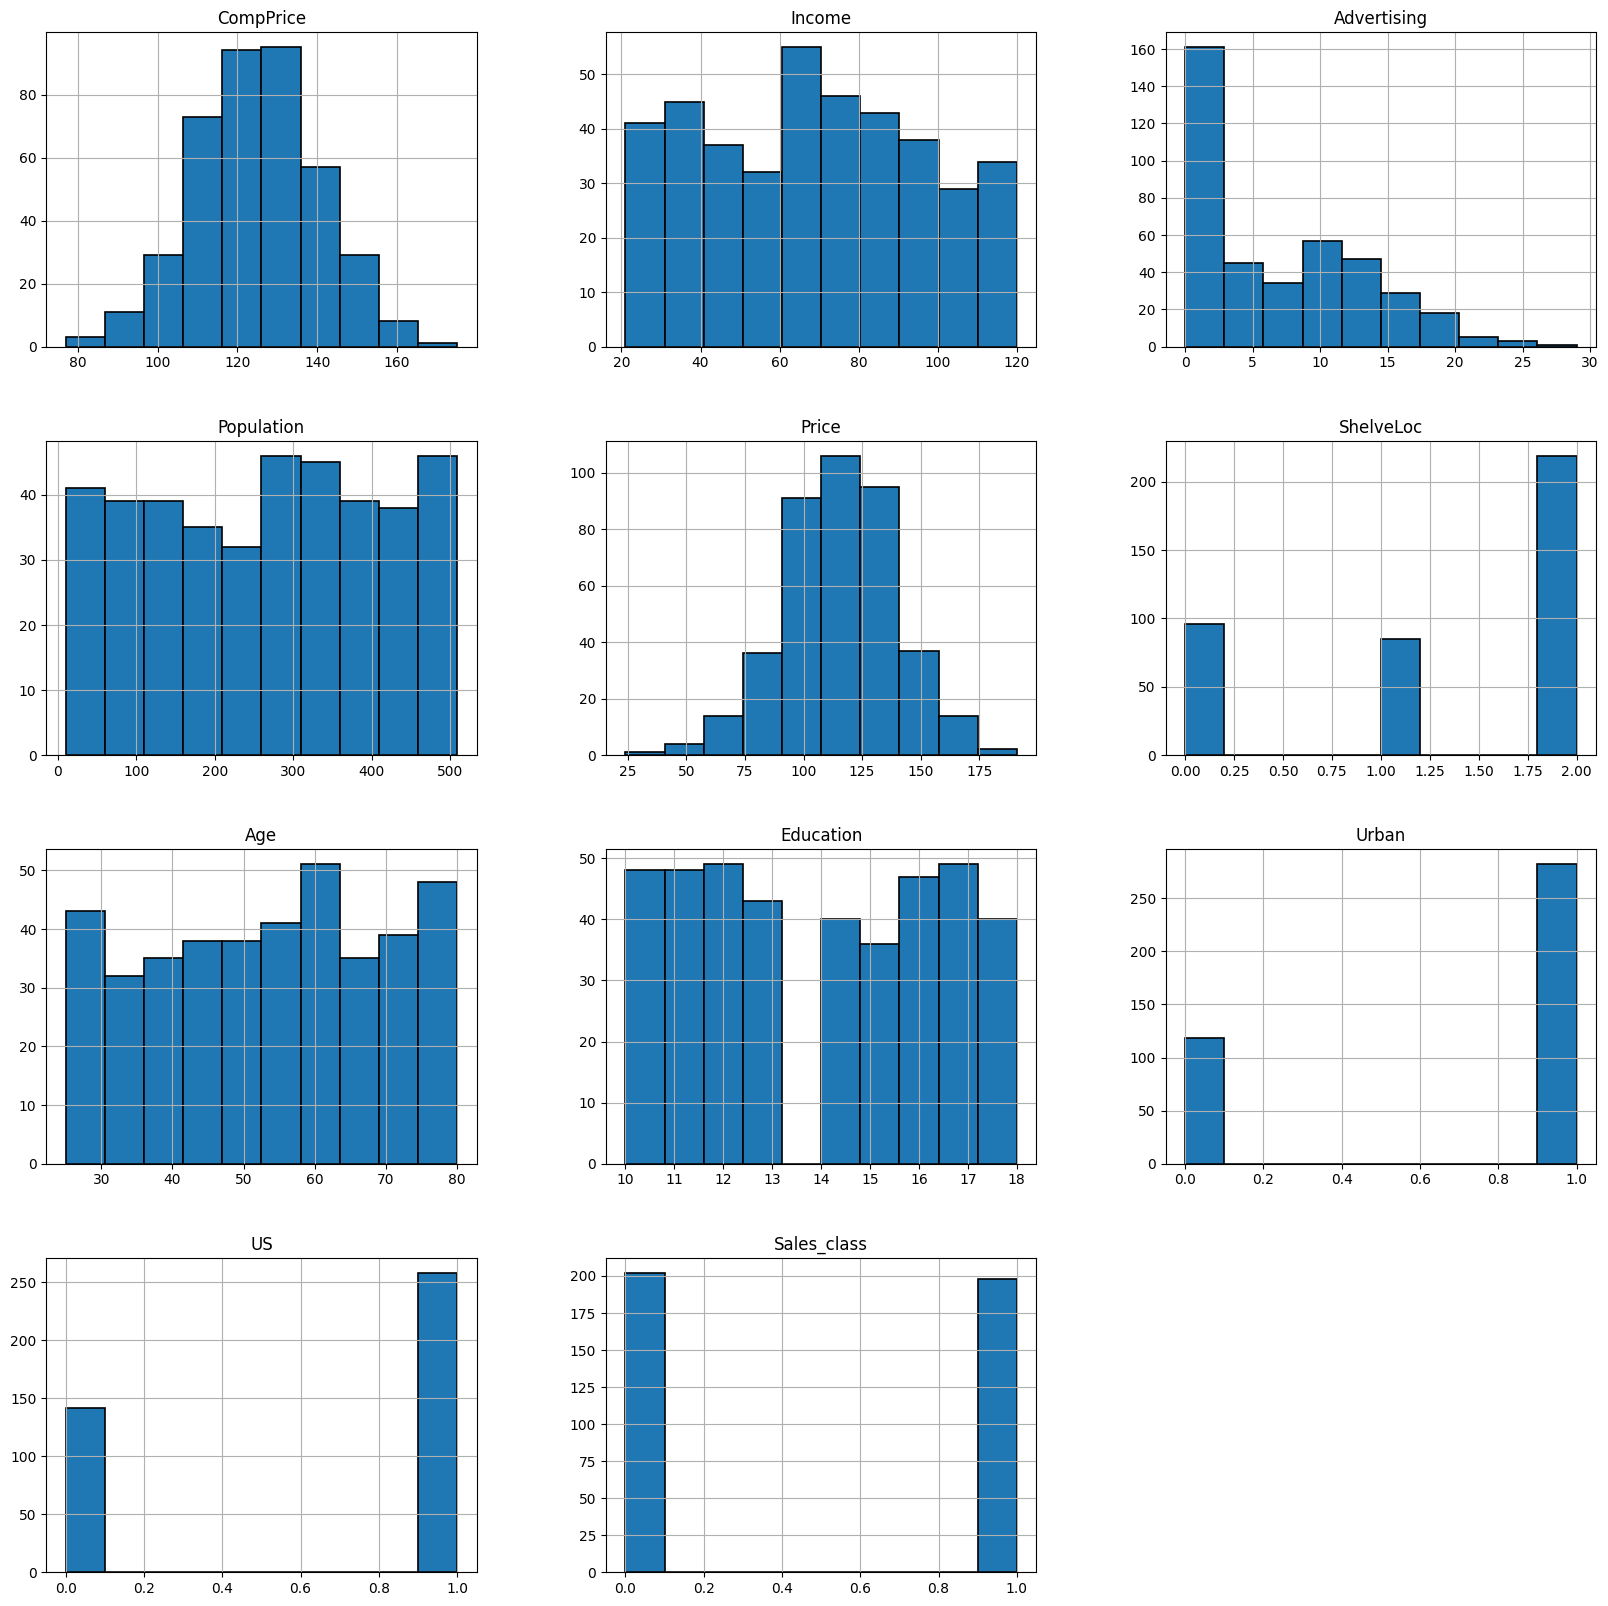

In [90]:
# Visulazing the distibution of the data for every feature
company.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

<Axes: >

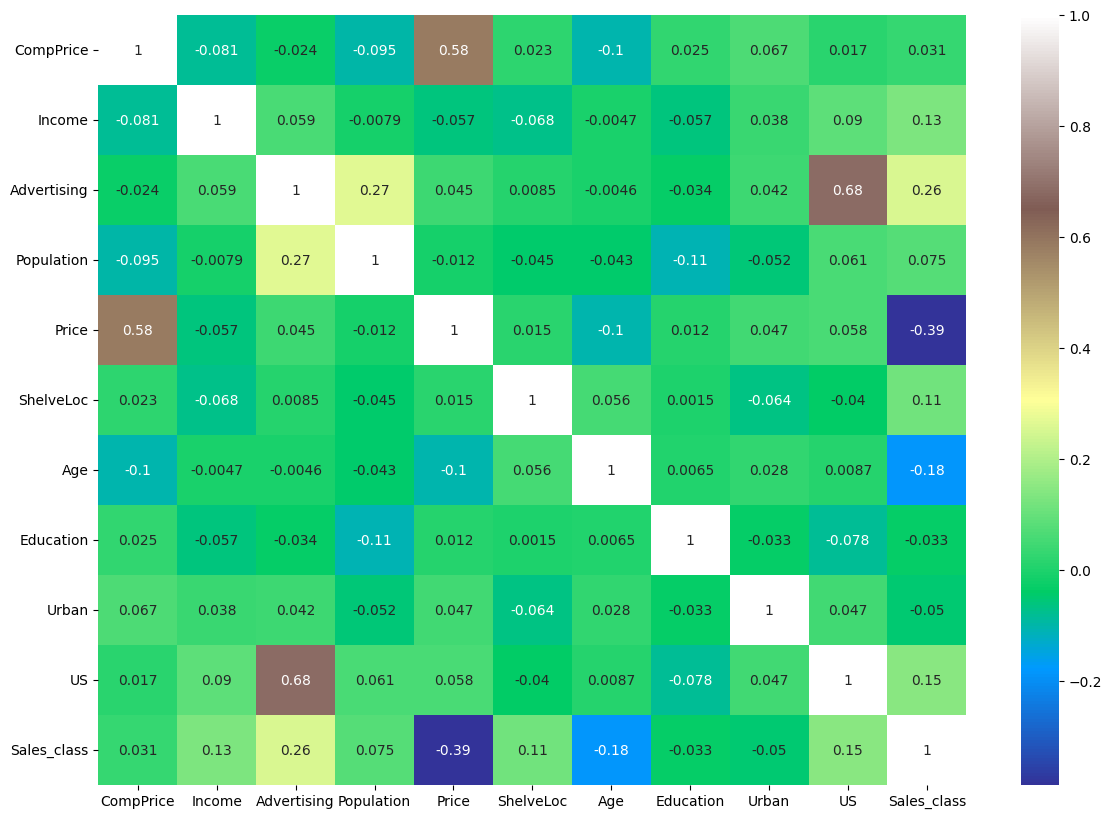

In [91]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(company.corr(),annot=True,cmap='terrain')

In [92]:
pdata=company.copy()
wd=company.copy()

In [93]:
x=pdata.iloc[:,0:-1]
y=pdata['Sales_class']

In [94]:
y.value_counts()

0    202
1    198
Name: Sales_class, dtype: int64

Splitting the data to train and test

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [96]:
x=pdata.iloc[:,0:-1]
y=pdata['Sales_class']

In [97]:
lr2=LogisticRegression(max_iter=1000)
lr2.fit(x_train,y_train)
acc = lr2.score(x_test,y_test)*100
print(acc)

78.75


In [98]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_score=roc_auc_score(y_test,lr2.predict(x_test))
logit_roc_score

0.785355122564425

Thus, by using the Logistic Regression We got 78.5% accuracy

In [99]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [100]:
kfold = KFold(n_splits=12, random_state=None)
results = cross_val_score(lr2, x,y, cv=kfold)
print("Using KFold cross validation result is : ",results.mean()*100.0)

Using KFold cross validation result is :  80.50356506238857


In [101]:
#Performance Report
def generateClassificationReport(y_test,y_pred):
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))    
    print('accuracy is ',accuracy_score(y_test,y_pred))

In [102]:
#Fitting Model, Predict, Evaluation
model = DecisionTreeClassifier()
acc1 = []
model.fit(x_train, y_train)
target_pred = model.predict(x_test)
generateClassificationReport(y_test,target_pred)
acc1.append(accuracy_score(y_test,target_pred))

print("\n Accuracy: ",stat.mean(acc1))

              precision    recall  f1-score   support

           0       0.63      0.70      0.67        37
           1       0.72      0.65      0.68        43

    accuracy                           0.68        80
   macro avg       0.68      0.68      0.67        80
weighted avg       0.68      0.68      0.68        80

[[26 11]
 [15 28]]
accuracy is  0.675

 Accuracy:  0.675


In [103]:
#Over Sampling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
#Apply Over Sampling
print('Before Oversampling')
print(sorted(Counter(y_train).items()))
x_train, y_train = SMOTE().fit_resample(x_train, y_train)
print('After Oversampling')
print(sorted(Counter(y_train).items()))

Before Oversampling
[(0, 137), (1, 143)]
After Oversampling
[(0, 143), (1, 143)]


In [104]:
#Fitting Model
model = DecisionTreeClassifier()
acc = []
model.fit(x_train, y_train)
target_pred = model.predict(x_test)
generateClassificationReport(y_test,target_pred)
acc.append(accuracy_score(y_test,target_pred))

print("\n Accuracy: ",stat.mean(acc))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70        65
           1       0.65      0.56      0.60        55

    accuracy                           0.66       120
   macro avg       0.66      0.65      0.65       120
weighted avg       0.66      0.66      0.66       120

[[48 17]
 [24 31]]
accuracy is  0.6583333333333333

 Accuracy:  0.6583333333333333


In [105]:
#Fitting Model
model = DecisionTreeClassifier()
acc = []
model.fit(x_train, y_train)
target_pred = model.predict(x_test)
generateClassificationReport(y_test,target_pred)
acc.append(accuracy_score(y_test,target_pred))

print("\n Accuracy: ",stat.mean(acc))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69        65
           1       0.63      0.62      0.62        55

    accuracy                           0.66       120
   macro avg       0.66      0.66      0.66       120
weighted avg       0.66      0.66      0.66       120

[[45 20]
 [21 34]]
accuracy is  0.6583333333333333

 Accuracy:  0.6583333333333333


In [106]:
#model 2-Entropy based splits
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[4] <= 134.5\nentropy = 1.0\nsamples = 286\nvalue = [143, 143]'),
 Text(0.25, 0.625, 'x[5] <= 0.5\nentropy = 0.982\nsamples = 230\nvalue = [97, 133]'),
 Text(0.125, 0.375, 'x[4] <= 86.0\nentropy = 0.804\nsamples = 53\nvalue = [40, 13]'),
 Text(0.0625, 0.125, 'entropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(0.1875, 0.125, 'entropy = 0.624\nsamples = 45\nvalue = [38, 7]'),
 Text(0.375, 0.375, 'x[5] <= 1.5\nentropy = 0.907\nsamples = 177\nvalue = [57, 120]'),
 Text(0.3125, 0.125, 'entropy = 0.434\nsamples = 56\nvalue = [5, 51]'),
 Text(0.4375, 0.125, 'entropy = 0.986\nsamples = 121\nvalue = [52, 69]'),
 Text(0.75, 0.625, 'x[0] <= 139.5\nentropy = 0.677\nsamples = 56\nvalue = [46, 10]'),
 Text(0.625, 0.375, 'x[3] <= 132.0\nentropy = 0.206\nsamples = 31\nvalue = [30, 1]'),
 Text(0.5625, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.875, 0.375, 'x[4] <= 142.5\nentropy = 0.943\nsa

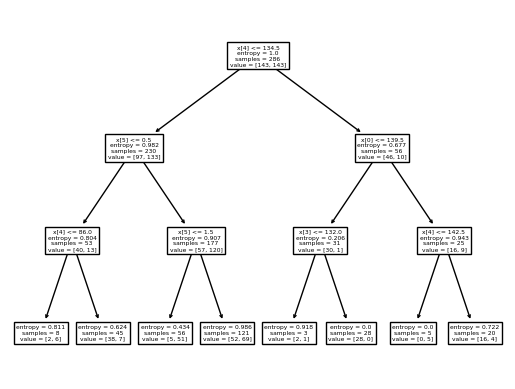

In [107]:
from sklearn import tree
tree.plot_tree(model2)

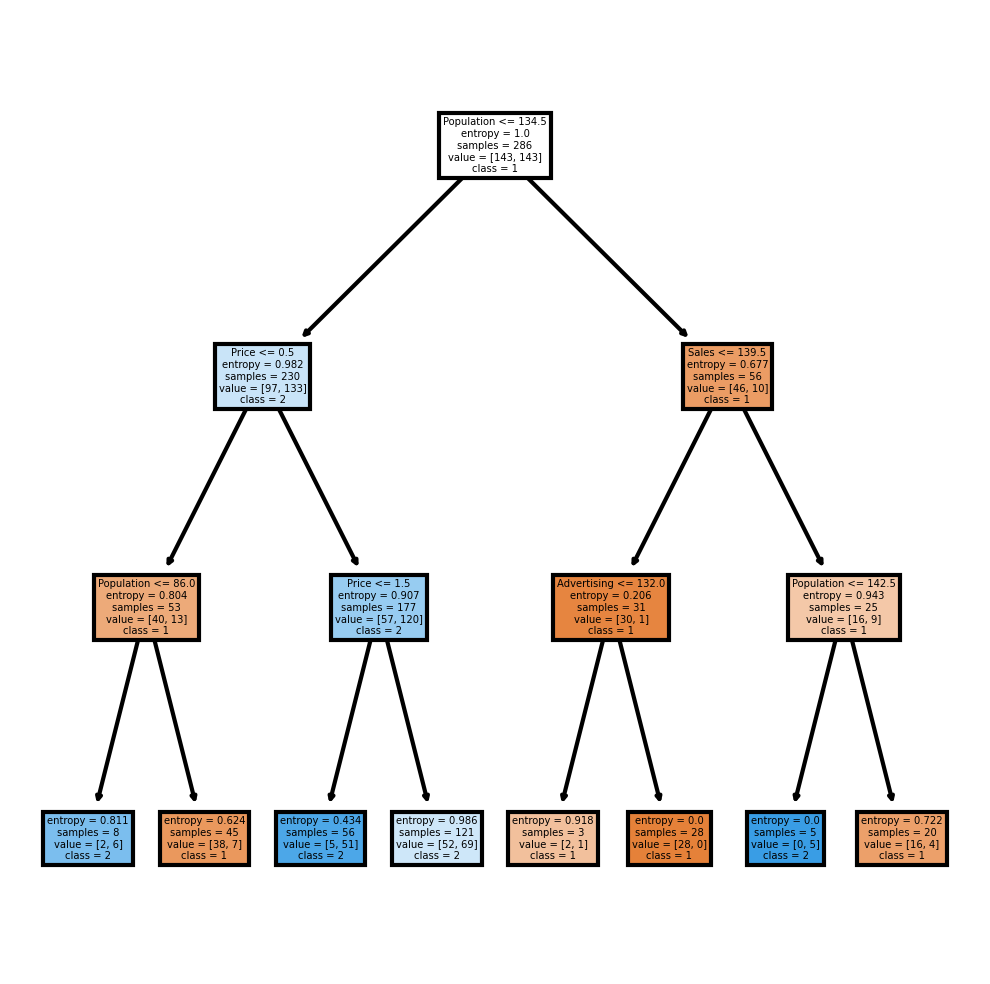

In [108]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [109]:
### Model 3 - default parameters
from sklearn import tree
dt2_gini = tree.DecisionTreeClassifier()   ## Instantiating DecisionTree-Classifier
dt2_gini.fit(x_train, y_train)  

DecisionTreeClassifier()

In [110]:
print('Train Accuracy =',dt2_gini.score(x_train, y_train))
print('Test Accuracy =',dt2_gini.score(x_test, y_test))

Train Accuracy = 1.0
Test Accuracy = 0.6583333333333333


In [111]:
## Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix
print("Train - Confusion Matrix")
print(confusion_matrix(y_train,dt2_gini.predict(x_train)))
print("Test - Confusion Matrix")
print(confusion_matrix(y_test,dt2_gini.predict(x_test)))

Train - Confusion Matrix
[[143   0]
 [  0 143]]
Test - Confusion Matrix
[[46 19]
 [22 33]]


In [112]:
## Important variables
features = x_train.columns
importances = dt2_gini.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([x_train.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9
0,Price,ShelveLoc,Age,Advertising,CompPrice,Income,Urban,Population,Education,US
1,0.245175,0.170734,0.123259,0.121479,0.11578,0.103868,0.06275,0.043124,0.013832,0.0


In [113]:
importances

array([0.11577952, 0.10386824, 0.12147863, 0.04312354, 0.24517523,
       0.17073424, 0.12325931, 0.01383175, 0.06274953, 0.        ])

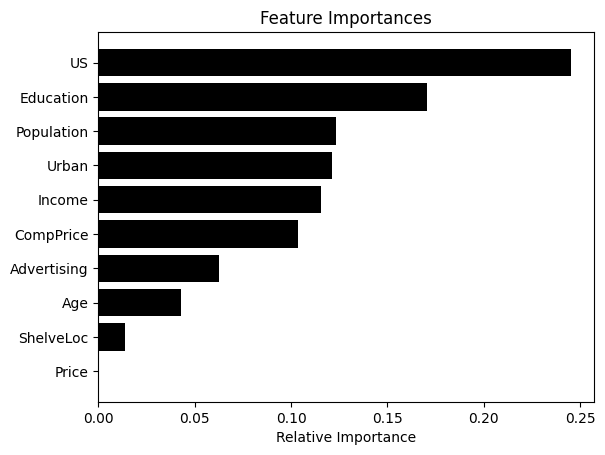

In [114]:
fig, ax = plt.subplots()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices][::-1], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [115]:
#Building Decision Tree Model using Variable Importance
indices

array([4, 5, 6, 2, 0, 1, 8, 3, 7, 9])

In [116]:
select = indices[0:5]
imp_tree = tree.DecisionTreeClassifier(max_depth=3)  ## Instantiating DecisionTree-Classifier
clf = imp_tree.fit(x_train.iloc[:,select], y_train)

In [117]:
print('Train Accuracy =',imp_tree.score(x_train.iloc[:,select], y_train))
print('Test Accuracy =',imp_tree.score(x_test.iloc[:,select], y_test))

Train Accuracy = 0.7412587412587412
Test Accuracy = 0.6416666666666667


In [118]:
## Randomized Hyper-parameter search with cross-validation
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

dt = tree.DecisionTreeClassifier() 

param_grid = {'criterion':['gini','entropy'],
             'max_leaf_nodes': np.arange(5,30,1),
             'max_depth':np.arange(3,15,1),
             }


rsearch_acc = RandomizedSearchCV(estimator=dt, param_distributions=param_grid,n_iter=500)
rsearch_acc.fit(x_train, y_train)

print(rsearch_acc.best_estimator_)
print('Train Accuracy =',rsearch_acc.best_score_)
print('Test Accuracy =',rsearch_acc.score(x_test, y_test))

print("Train - Confusion Matrix")
print(confusion_matrix(y_train,rsearch_acc.predict(x_train)))
print("Test - Confusion Matrix")
print(confusion_matrix(y_test,rsearch_acc.predict(x_test)))

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=21)
Train Accuracy = 0.7550514216575922
Test Accuracy = 0.7333333333333333
Train - Confusion Matrix
[[129  14]
 [ 13 130]]
Test - Confusion Matrix
[[49 16]
 [16 39]]


In [119]:
### Making predictions
predicted= pd.DataFrame(rsearch_acc.predict(x_train))
company['predicted'] = predicted
company.to_csv("company_predictions.csv")